# 토치비전
- 유명한 데이터셋들, 이미 구현되어 있는 유명한 모델, 일반적인 이미지 전처리 도구들을 포함한 패키지
https://pytorch.org/docs/stable/torchvision/index.html

In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import random

- cuda를 사용하기 위한 방법

In [3]:
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print("다음 기기로 학습합니다. : ", device)

다음 기기로 학습합니다. :  cuda


In [4]:
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [12]:
training_epochs = 15
batch_size = 100

In [13]:
mnist_train = dsets.MNIST(root='MNIST_data/', # root : 다운로드 받을 경로
                         train=True, # train - True : train데이터 /  False : test 데이터
                         transform=transforms.ToTensor(), # 현재데이터를 파이토치 텐서로 변환
                         download=True) # 해당 경로에 MNIST가 없다면 다운로드 받겠다.

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [14]:
data_loader = DataLoader(dataset=mnist_train, # 로드할 대상
                        batch_size = batch_size, # 배치사이즈
                        shuffle=True, # 셔플 여부
                        drop_last=True) # 마지막 배치를 버릴 것인지

**마지막 배치를 버리는 이유** : \
1,000개의 데이터가 있을 때, 배치 크기가 128이면 마지막은 104개가 남는다. 128를 만족하지 못하므로 버려서 과대 평가되는 현상을 막아준다.

In [15]:
linear = nn.Linear(784, 10, bias=True).to(device) # bais : 편향 값을 사용할 것인지(기본 True) / to : 어디서 수행할지 정함

In [16]:
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 함수를 포함
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [18]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    
    for X, Y in data_loader:
        X = X.view(-1, 28 * 28).to(device) # 배치 크기가 100이므로 아래의 연산에서 X는 (100, 784)의 텐서
        Y = Y.to(device) # 레이블은 원핫인코딩이 된 상태가 아니라 0~9의 정수
        
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch
        
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.535034657
Epoch: 0002 cost = 0.359426379
Epoch: 0003 cost = 0.330938488
Epoch: 0004 cost = 0.316720337
Epoch: 0005 cost = 0.306803167
Epoch: 0006 cost = 0.300238997
Epoch: 0007 cost = 0.295368165
Epoch: 0008 cost = 0.290846020
Epoch: 0009 cost = 0.287643671
Epoch: 0010 cost = 0.284529567
Epoch: 0011 cost = 0.282080382
Epoch: 0012 cost = 0.279741704
Epoch: 0013 cost = 0.277910173
Epoch: 0014 cost = 0.276136696
Epoch: 0015 cost = 0.274232477
Learning finished


tensor([ True,  True,  True,  ...,  True, False,  True], device='cuda:0')
Accuracy: 0.8810999989509583
Label:  2
Prediction:  2


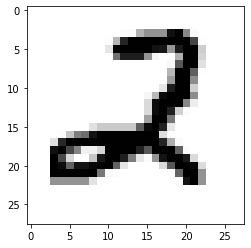

In [30]:
# 일시적으로 모든 require_grad 플래그를 false로 설정
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())
    
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r+1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r+1].to(device)
    
    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())
    
    plt.imshow(mnist_test.test_data[r:r+1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()